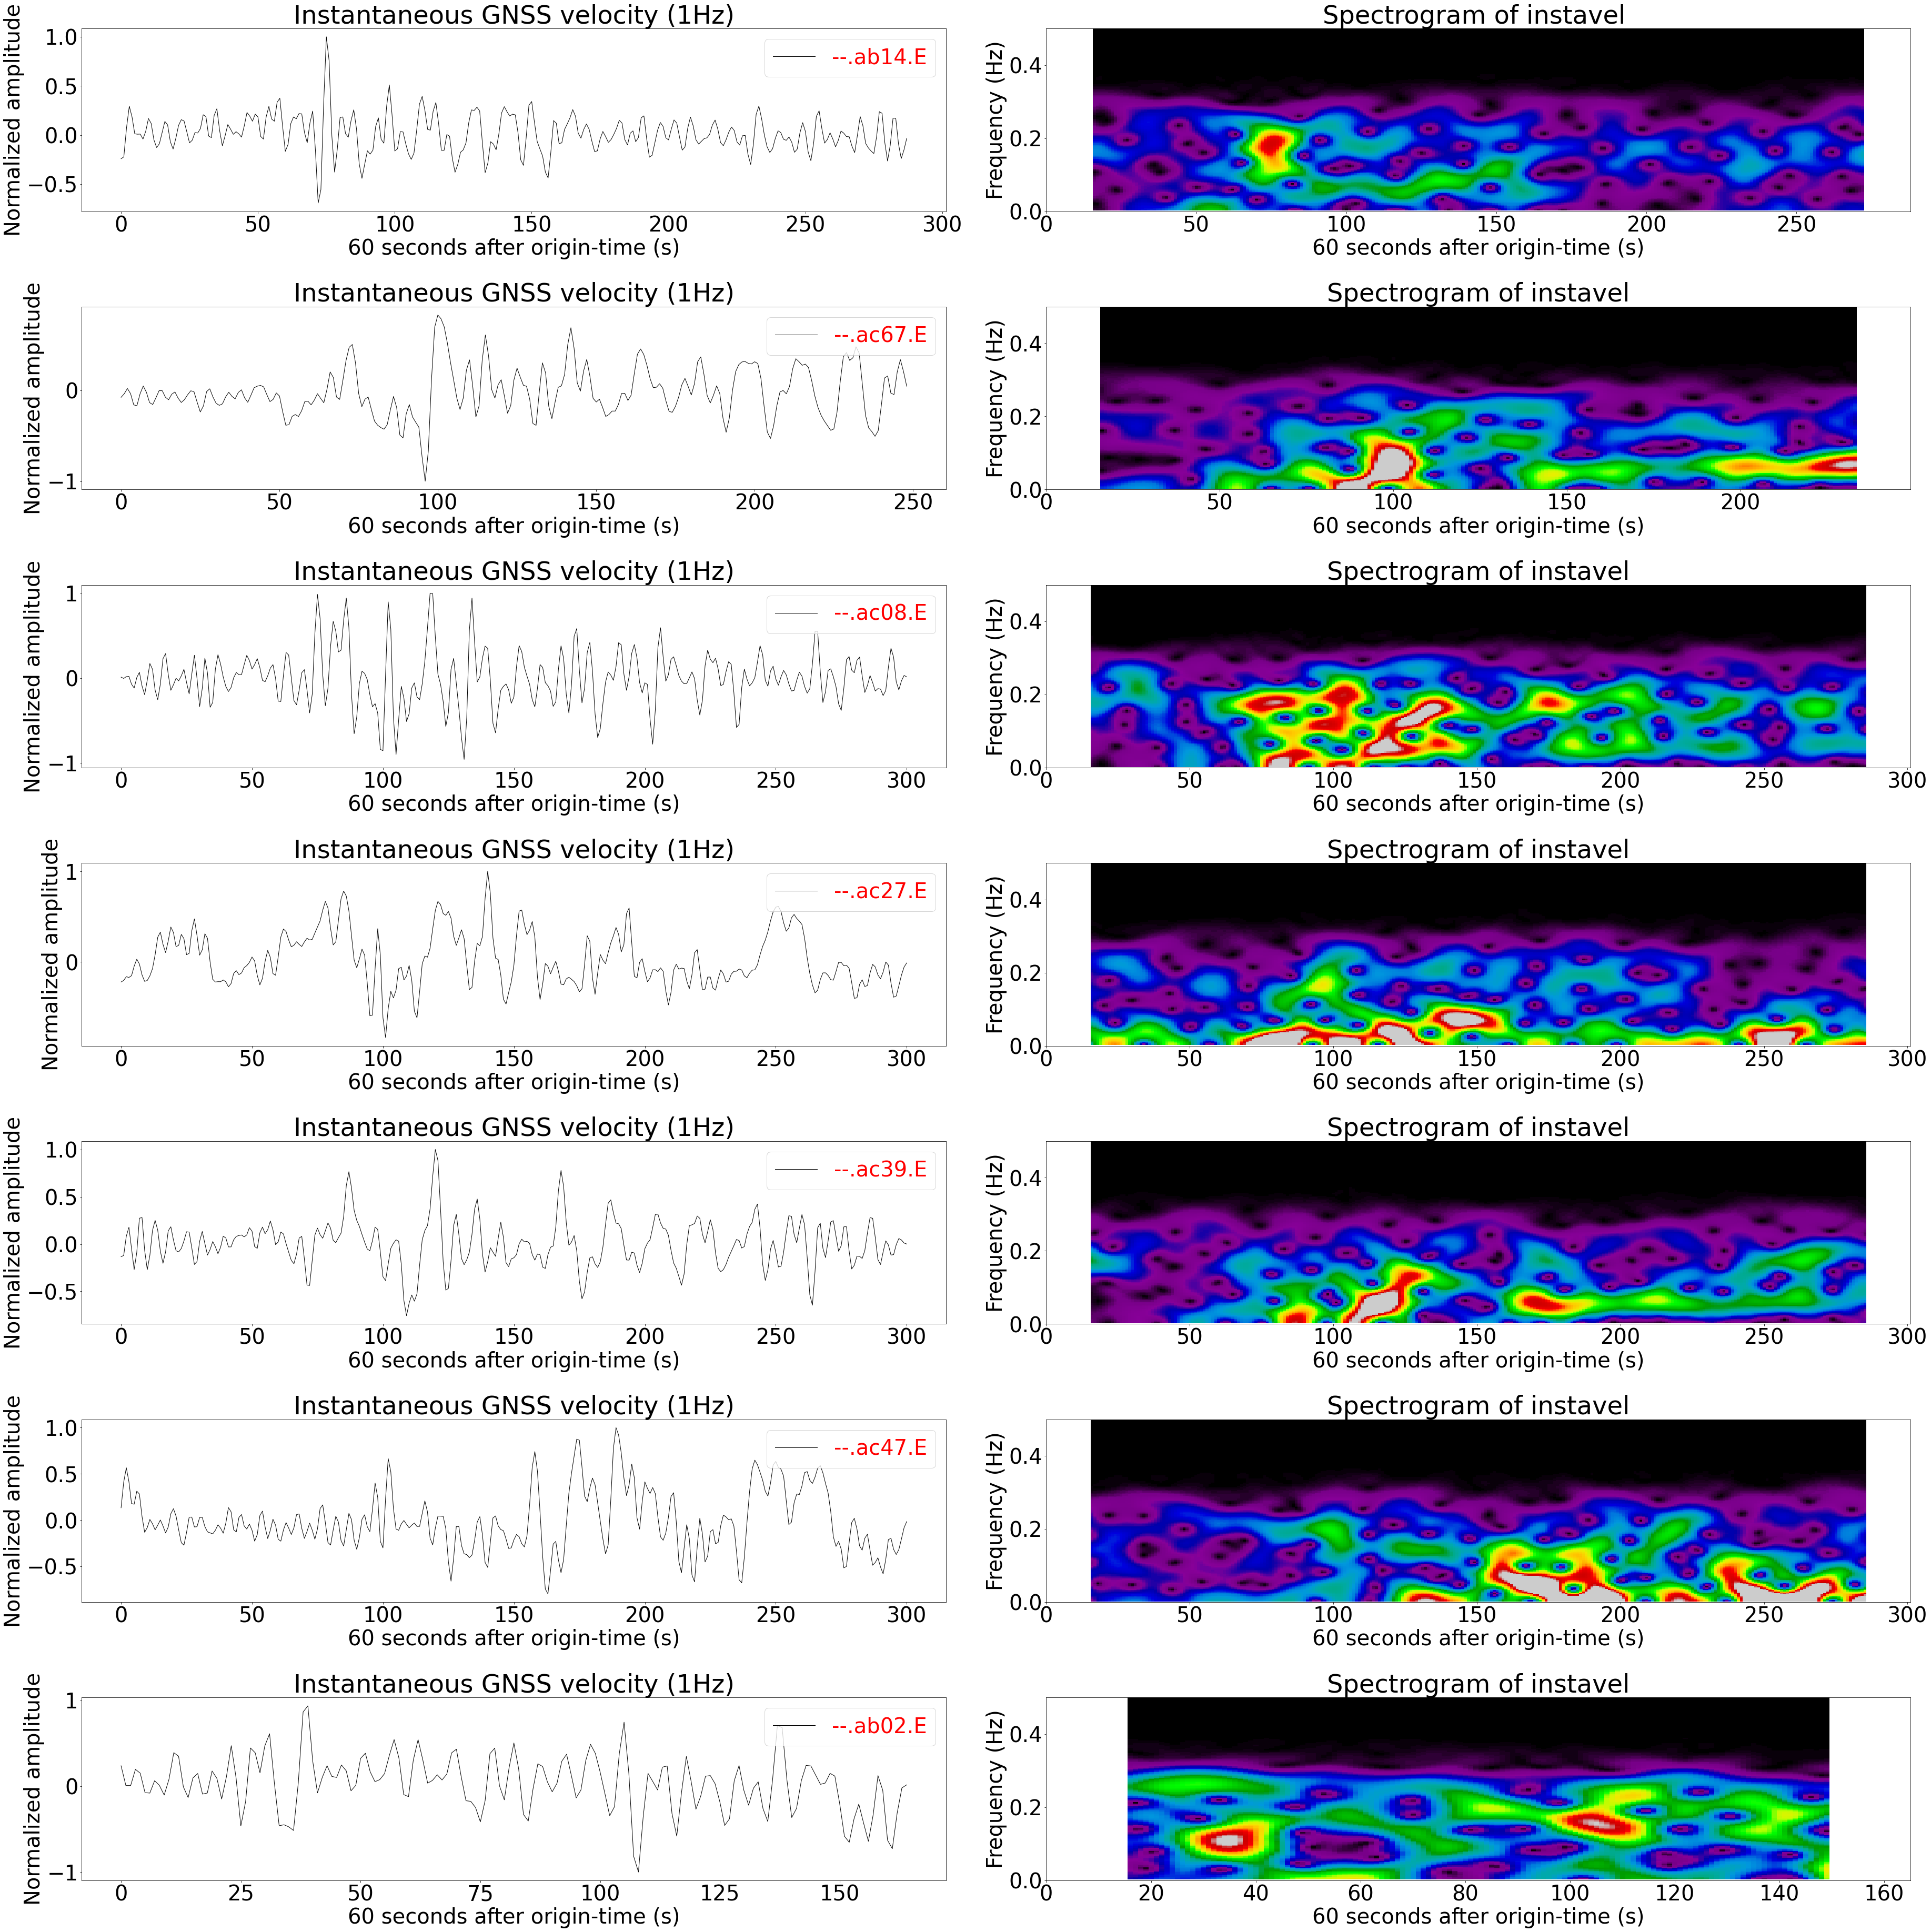

In [47]:
######## GNSS instavel Vs strong-motion derived velocity analysis and plots ##################
################################## Scipy version #############################################
####################################### Goals ################################################
#     1) Read a GNSS instavel and convert it into an obspy stream
#     2) Filter instavel
#     3) Load acceleration from IRIS client
#     4) Filter and integrate strong-motion acceleration to corresponding velocity
#     5) Subtract/find difference between GNSS and strong motion veocity
#     6) Subtract the difference from GNSS and plot trace
#     7) cross-correlate and plot both versions
##############################################################################################

from obspy import UTCDateTime 				
from obspy import Trace
from obspy import Stream
from obspy import read_inventory
from obspy.signal.cross_correlation import correlate
from obspy.clients.fdsn import Client 		
client=Client("IRIS")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import datetime

# READ INSTAVEL ASCII FILE
st = Stream(Trace())
# "ac21", "ac28", "ac13", "ab07", "ac41", "ac40", 
# "ac52", "ac45", "ac25", "ac02", "ac42", "ac26", 
# "ab14", "ac67", "ac08", "ac27", "ac39", "ac47","ab02"
for sta in ["ab14", "ac67", "ac08", "ac27", "ac39", "ac47","ab02"]:
    infile = f"Chignik_phase_vels/n/{sta}_1hz.L2.igr.phase_vels"
    site = np.genfromtxt(infile, dtype=None, encoding=None, names=['date','time','dt','lat','lon','height','vx', 'vy', 'vz', 'sigx', 'sigy', 'sigz', 'vdt', 'vn', 've', 'vu', 'sign', 'sige', 'sigu'])

# CREATE AN EMPTY STREAM AND POPULATE WITH INSTAVEL DATA1
    st_gnss = Trace()
    st_gnss.stats.network = '--'
    st_gnss.stats.station = f'{sta}'
    st_gnss.stats.channel = 'E'       # for [I]nst[V]el [E] component]
    st_gnss.stats.starttime = site["date"][0] + 'T' + site["time"][0]
    st_gnss.stats.sampling_rate = 1
    st_gnss.stats.calib = 1
    st_gnss.data = site['ve']
    st_gnss.detrend('linear')
    st_gnss.detrend('demean')
    dt = UTCDateTime("2021-07-29T06:15:47.000000Z")
    st_gnss.trim(dt+60, dt+360)
    st_gnss.filter('bandpass', freqmin=0.001, freqmax=0.25, corners=4, zerophase=True)
    st_gnss.normalize()
    st += Stream([st_gnss])

#print(st)
#print(st[1])
#print(st[2])

# CREATE STREAMS WITH ALL TRACES AND PLOT THEM
plt.rcParams['figure.figsize'] = [52,52]
plt.rcParams.update({'font.size': 40})
#plt.style.use('seaborn')

fig, ax = plt.subplots(7,2)
ax[0,0].plot(st[1].times(), st[1].data, 'k-', linewidth=1, 
             label=(st[1].stats['network'])+'.'+(st[1].stats['station'])+'.'+(st[1].stats['channel']))
ax[0,0].set_title(f'Instantaneous GNSS velocity (1Hz)')
ax[0,0].set_ylabel('Normalized amplitude')
ax[0,0].set_xlabel('60 seconds after origin-time (s)', fontsize=40) #Seconds after Origin-time
ax[1,0].plot(st[2].times(), st[2].data, 'k-', linewidth=1, 
             label=(st[2].stats['network'])+'.'+(st[2].stats['station'])+'.'+(st[2].stats['channel']))
ax[1,0].set_title(f'Instantaneous GNSS velocity (1Hz)')
ax[1,0].set_ylabel('Normalized amplitude')
ax[1,0].set_xlabel('60 seconds after origin-time (s)')
ax[2,0].plot(st[3].times(), st[3].data, 'k-', linewidth=1, 
             label=(st[3].stats['network'])+'.'+(st[3].stats['station'])+'.'+(st[3].stats['channel']))
ax[2,0].set_title(f'Instantaneous GNSS velocity (1Hz)')
ax[2,0].set_ylabel('Normalized amplitude')
ax[2,0].set_xlabel('60 seconds after origin-time (s)')
ax[3,0].plot(st[4].times(), st[4].data, 'k-', linewidth=1, 
             label=(st[4].stats['network'])+'.'+(st[4].stats['station'])+'.'+(st[4].stats['channel']))
ax[3,0].set_title(f'Instantaneous GNSS velocity (1Hz)')
ax[3,0].set_ylabel('Normalized amplitude')
ax[3,0].set_xlabel('60 seconds after origin-time (s)')
ax[4,0].plot(st[5].times(), st[5].data, 'k-', linewidth=1, 
             label=(st[5].stats['network'])+'.'+(st[5].stats['station'])+'.'+(st[5].stats['channel']))
ax[4,0].set_title(f'Instantaneous GNSS velocity (1Hz)')
ax[4,0].set_ylabel('Normalized amplitude')
ax[4,0].set_xlabel('60 seconds after origin-time (s)')
ax[5,0].plot(st[6].times(), st[6].data, 'k-', linewidth=1, 
             label=(st[6].stats['network'])+'.'+(st[6].stats['station'])+'.'+(st[6].stats['channel']))
ax[5,0].set_title(f'Instantaneous GNSS velocity (1Hz)')
ax[5,0].set_ylabel('Normalized amplitude')
ax[5,0].set_xlabel('60 seconds after origin-time (s)')
ax[6,0].plot(st[7].times(), st[7].data, 'k-', linewidth=1, 
             label=(st[7].stats['network'])+'.'+(st[7].stats['station'])+'.'+(st[7].stats['channel']))
ax[6,0].set_title(f'Instantaneous GNSS velocity (1Hz)')
ax[6,0].set_ylabel('Normalized amplitude')
ax[6,0].set_xlabel('60 seconds after origin-time (s)')

st[1].spectrogram(axes=ax[0,1], show=True, samp_rate=st[1].stats.sampling_rate, 
                  per_lap=0.99, wlen=30, log=False, cmap='nipy_spectral')

ax[0, 1].set_title(f'Spectrogram of instavel ')
ax[0, 1].set_ylabel('Frequency (Hz)')
ax[0, 1].set_xlabel('60 seconds after origin-time (s)') #Seconds after Origin-time 
ax[0, 1].set_ylim((0,0.5))
ax[0, 1].images[0].set_clim(vmin=0, vmax=1.5)
#mappable = ax[0,1].images[0]
#ax13 = fig.add_axes([0.99, 0.412, 0.01, 0.21])
#plt.colorbar(mappable=mappable, cax=ax13)

st[2].spectrogram(axes=ax[1,1], show=True, samp_rate=st[2].stats.sampling_rate, 
                  per_lap=0.99, wlen=30, log=False, cmap='nipy_spectral')
ax[1, 1].set_title(f'Spectrogram of instavel')
ax[1, 1].set_ylabel('Frequency (Hz)')
ax[1, 1].set_xlabel('60 seconds after origin-time (s)') #Seconds after Origin-time
ax[1, 1].set_ylim((0,0.5))
ax[1, 1].images[0].set_clim(vmin=0, vmax=1.5)
#mappable = ax[1,1].images[0]
#ax23 = fig.add_axes([0.92, 0.738, 0.01, 0.21])
#plt.colorbar(mappable=mappable, cax=ax23)

st[3].spectrogram(axes=ax[2,1], show=True, samp_rate=st[3].stats.sampling_rate, 
                  per_lap=0.99, wlen=30, log=False, cmap='nipy_spectral')
ax[2, 1].set_title(f'Spectrogram of instavel')
ax[2, 1].set_ylabel('Frequency (Hz)')
ax[2, 1].set_xlabel('60 seconds after origin-time (s)') #Seconds after Origin-time
ax[2, 1].set_ylim((0,0.5))
ax[2, 1].images[0].set_clim(vmin=0, vmax=1.5)

st[4].spectrogram(axes=ax[3,1], show=True, samp_rate=st[4].stats.sampling_rate, 
                  per_lap=0.99, wlen=30, log=False, cmap='nipy_spectral')
ax[3, 1].set_title(f'Spectrogram of instavel')
ax[3, 1].set_ylabel('Frequency (Hz)')
ax[3, 1].set_xlabel('60 seconds after origin-time (s)') #Seconds after Origin-time
ax[3, 1].set_ylim((0,0.5))
ax[3, 1].images[0].set_clim(vmin=0, vmax=1.5) 

st[5].spectrogram(axes=ax[4,1], show=True, samp_rate=st[5].stats.sampling_rate, 
                  per_lap=0.99, wlen=30, log=False, cmap='nipy_spectral')
ax[4, 1].set_title(f'Spectrogram of instavel')
ax[4, 1].set_ylabel('Frequency (Hz)')
ax[4, 1].set_xlabel('60 seconds after origin-time (s)')  #Seconds after Origin-time
ax[4, 1].set_ylim((0,0.5))
ax[4, 1].images[0].set_clim(vmin=0, vmax=1.5)

st[6].spectrogram(axes=ax[5,1], show=True, samp_rate=st[6].stats.sampling_rate, 
                  per_lap=0.99, wlen=30, log=False, cmap='nipy_spectral')
ax[5, 1].set_title(f'Spectrogram of instavel')
ax[5, 1].set_ylabel('Frequency (Hz)')
ax[5, 1].set_xlabel('60 seconds after origin-time (s)') #Seconds after Origin-time
ax[5, 1].set_ylim((0,0.5))
ax[5, 1].images[0].set_clim(vmin=0, vmax=1.5)

st[7].spectrogram(axes=ax[6,1], show=True, samp_rate=st[7].stats.sampling_rate, 
                  per_lap=0.99, wlen=30, log=False, cmap='nipy_spectral')
ax[6, 1].set_title(f'Spectrogram of instavel')
ax[6, 1].set_ylabel('Frequency (Hz)')
ax[6, 1].set_xlabel('60 seconds after origin-time (s)')
ax[6, 1].set_ylim((0,0.5))
ax[6, 1].images[0].set_clim(vmin=0, vmax=1.5)

plt.tight_layout()

# TRACE LEGENDS
for row in ax[:,0]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend
#for row in ax[:,1]:
#    ll = row.legend(loc=1)
#    plt.setp(ll.get_texts(), color='red') #color legend

#ll = ax[1,1].legend(loc=1)
#plt.setp(ll.get_texts(), color='red') #color legend

plt.show()
fig.savefig("GNSS_freq3_filt.png")
